<a href="https://colab.research.google.com/github/LucasHenrique-dev/projeto-QTS/blob/main/desenvolvimento/GeradrorQTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar Bibliotecas

In [1]:
import time
import random
import math
import sys
import json
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Importar Informações

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1Zv5i7SI4MMgMzSQjeBIS9q2AMAkbA0bX' #<-- You add in here the id from you google drive file, you can find it


download = drive.CreateFile({'id': file_id})


# Download the file to a local disc
download.GetContentFile('info_curso.json')

##Explorar Dados do Curso

In [3]:
arquivo = open('/content/info_curso.json')
curso = json.load(arquivo)

print(json.dumps(curso, indent=4))

{
    "horario_inicio": "7:00",
    "horario_fim": "12:00",
    "quantidade_turmas": 5,
    "disciplinas": {
        "SO": {
            "nome": "Sistemas Operacionais",
            "hora_aula": 1,
            "carga_horaria_semanal": 4
        },
        "MF": {
            "nome": "M\u00e9todos Formais",
            "hora_aula": 1,
            "carga_horaria_semanal": 4
        },
        "OC": {
            "nome": "Organiza\u00e7\u00e3o de Computadores",
            "hora_aula": 1,
            "carga_horaria_semanal": 4
        },
        "CO": {
            "nome": "Compiladores",
            "hora_aula": 1,
            "carga_horaria_semanal": 4
        },
        "IA": {
            "nome": "Intelig\u00eancia Artificial",
            "hora_aula": 1,
            "carga_horaria_semanal": 4
        }
    }
}


In [4]:
disciplinas = {0: ('NA', 'Horário Vago')}

for index, disciplina in enumerate(curso["disciplinas"].items()):
  disciplinas[index+1] = (disciplina[0], disciplina[1]["nome"])

disciplinas

{0: ('NA', 'Horário Vago'),
 1: ('SO', 'Sistemas Operacionais'),
 2: ('MF', 'Métodos Formais'),
 3: ('OC', 'Organização de Computadores'),
 4: ('CO', 'Compiladores'),
 5: ('IA', 'Inteligência Artificial')}

## Funções Auxiliares

In [5]:
def converter_minutos(hora):
  t = time.strptime(hora, '%H:%M')
  minutos = t[3] * 60 + t[4]
  return minutos

In [6]:
def calcular_disciplinas_dia(curso, segmentacao_horario):
  inicio, fim = curso['horario_inicio'], curso['horario_fim']
  inicio, fim = converter_minutos(inicio), converter_minutos(fim)
  return ((fim - inicio)/segmentacao_horario) + 1

In [7]:
def calcular_horas_vagas(disciplinas):
  return (''.join(disciplinas).replace("NA", ' ')).strip().count(" ")

In [8]:
def gerar_cromossomo(turmas, qtd_dias_semana, disciplinas_dia, dominio):
  return [random.randint(0, dominio-1) for i in range(turmas*qtd_dias_semana*disciplinas_dia)]

In [9]:
cromossomo = gerar_cromossomo(5, 5, 6, 5)
print(cromossomo, "\nTamanho:", len(cromossomo))

[3, 4, 1, 3, 2, 1, 3, 2, 2, 0, 3, 0, 1, 2, 4, 4, 3, 2, 0, 2, 4, 0, 4, 0, 0, 2, 1, 4, 2, 0, 4, 1, 3, 0, 0, 4, 1, 1, 1, 0, 0, 3, 1, 2, 3, 2, 4, 2, 0, 1, 4, 4, 2, 4, 4, 1, 4, 2, 1, 3, 1, 3, 1, 0, 2, 2, 0, 0, 1, 4, 0, 0, 4, 4, 2, 2, 3, 2, 3, 1, 0, 1, 1, 3, 3, 3, 2, 2, 3, 2, 0, 2, 1, 4, 3, 3, 3, 2, 1, 2, 1, 4, 4, 0, 3, 0, 3, 4, 1, 3, 4, 0, 0, 0, 4, 0, 0, 4, 0, 1, 1, 2, 0, 0, 1, 2, 4, 0, 0, 3, 4, 1, 2, 0, 0, 4, 1, 2, 3, 3, 0, 1, 4, 3, 2, 4, 1, 0, 2, 3] 
Tamanho: 150


In [10]:
# def calcular_horas_vagas(aulas):
#   primeira_aula = ultima_aula = 0

#   aulas_nao_vagas = [pos for pos, aula in enumerate(aulas, 0) if aula != 0]

#   if len(aulas_nao_vagas) > 0:
#     primeira_aula = aulas_nao_vagas[0]      #coleta o index da primeira aula não vaga
#     ultima_aula = aulas_nao_vagas[-1]       #coleta o index da última aula não vaga
#   else:
#     primeira_aula = disciplinas_dia         #define a primeira aula como a última do dia
  
#   # print("Inicio: ", primeira_aula, "\nFim: ", ultima_aula, "\nSemana: ", aulas[primeira_aula:ultima_aula+1])
#   return aulas[primeira_aula:ultima_aula+1].count(0)

In [11]:
def calcular_horas_vagas(aulas):
  disciplinas = set(aulas);
  aula_vaga = 0

  for disciplina in disciplinas:
    aula_atual = 0
    proxima_aula = 1
    while aulas[proxima_aula:].count(disciplina) > 1:
      # print("Aula Atual: ", aula_atual, "     Proxima Aula: ", proxima_aula)
      aula_atual = aulas.index(disciplina, proxima_aula)
      proxima_aula = aulas.index(disciplina, aula_atual+1)

      aula_vaga += proxima_aula - (aula_atual + 1)

  return aula_vaga

In [12]:
calcular_horas_vagas([1,1,2,1,1])

1

In [13]:
def calcular_aulas_esparsas(aulas, agrupamento):
  aulas_esparsas = 0
  i = 0

  while i < len(aulas):
    if aulas[i] == 0:                                             #desconsidera aulas vagas
      i += 1
      continue      
    
    # print("Grupo de aulas: ", aulas[i:i+agrupamento])
    tamanho_grupo_aulas = len(set(aulas[i:i+agrupamento]))        
    if tamanho_grupo_aulas != 1:                                  #verifica se aulas estão agrupadas
      aulas_esparsas += tamanho_grupo_aulas
      i += 1
      continue
    
    i += agrupamento
  
  return aulas_esparsas

In [14]:
calcular_aulas_esparsas([1,1,2,1,1], 2)

2

In [15]:
dias_semana = ['Segunda','Terça','Quarta','Quinta','Sexta']

## Objetivo

O algoritmo visará montar um quadro de trabalho semanal contendo o menor **Tempo de Espera Entre Aulas** possível

Tempo de Espera Entre Aulas: horário de aula vaga entre aulas da mesma disciplina

##Definir Cromossomo

Definir a sequência genética de formação de um cromossomo

Os genes determinam aspectos de um indivíduo e o cromossomo é o conjunto dessas características o qual forma o indivíduo (possível solução do problema)

O cromossomo está estruturado da seguinte forma:
- turma -> dias da semana -> disciplinas
- Não há divisão física entre os dados, eles são sequenciais
- As informações indicadas no primeiro tópico se repetem N vezes onde N indica o número de turmas

[Turma1:(Segunda:(..disciplinas), Terça:(..disciplinas), Quarta:(..disciplinas), Quinta:(..disciplinas), Sexta:(..disciplinas)), Turma2:(Segunda:(..disciplinas), Terça:(..disciplinas), Quarta:(..disciplinas), Quinta:(..disciplinas), Sexta:(..disciplinas))..]

Ex.: [(SO,SO,SO,SO,MF,MF), (MF,MF,OC,OC,OC,OC), (CO,CO,CO,CO,IA,IA), (IA,IA,NA,NA,NA,NA), (NA,NA,NA,NA,NA,NA),</br>
(SO,SO,SO,SO,MF,MF), (MF,MF,OC,OC,OC,OC), (CO,CO,CO,CO,IA,IA), (IA,IA,NA,NA,NA,NA), (NA,NA,NA,NA,NA,NA)]

In [16]:
segmentacao_horario = 60                                                          # Divisão do horário no QTS (minutos)
disciplinas_dia = int(calcular_disciplinas_dia(curso, segmentacao_horario))       # Retorna quantidade de sessões destinadas às disciplinas em um dia

In [17]:
disciplinas_dia

6

##Impressão de Quadro de Trabalho Semanal

In [18]:
def imprimir_qts(calendario):
  dia_id = 0
  espera_total = 0
  qtd_dias_semana = len(dias_semana)

  for i in range(curso["quantidade_turmas"]):
    print(f"\n{i+1}ª Turma:")
    inicio_turma = i*(disciplinas_dia*qtd_dias_semana)
    for j in range(qtd_dias_semana):
        dia = dias_semana[j]
        comeco_semana = inicio_turma + j*disciplinas_dia
        
        disciplinas_semana = calendario[comeco_semana:comeco_semana+disciplinas_dia]                        # coleta as disciplinas da semana
        ordem_disciplinas = [disciplinas[disciplina][0] for disciplina in disciplinas_semana]               # traduz números em disciplinas

        dia_id += 1                                                                                         # próximo dia da semana
        print(f'|{dia:7}| {", ".join(ordem_disciplinas)}|')
        
        espera_total += calcular_horas_vagas(ordem_disciplinas)

  print('\nTempo Total de Espera Entre Aulas: ', espera_total)

In [19]:
imprimir_qts([1,1,1,1,2,2, 2,2,3,3,3,3, 4,4,4,4,5,5, 5,5,0,0,0,0, 0,0,0,0,0,0,
              1,1,1,1,2,2, 2,2,3,3,3,3, 4,4,4,4,5,5, 5,5,0,0,0,0, 0,0,0,0,0,0,
              1,1,1,1,2,2, 2,2,3,3,3,3, 4,4,4,4,5,5, 5,5,0,0,0,0, 0,0,0,0,0,0,
              1,1,1,1,2,2, 2,2,3,3,3,3, 4,4,4,4,5,5, 5,5,0,0,0,0, 0,0,0,0,0,0,
              1,1,1,1,2,2, 2,2,3,3,3,3, 4,4,4,4,5,5, 5,5,0,0,0,0, 0,0,0,0,0,0])


1ª Turma:
|Segunda| SO, SO, SO, SO, MF, MF|
|Terça  | MF, MF, OC, OC, OC, OC|
|Quarta | CO, CO, CO, CO, IA, IA|
|Quinta | IA, IA, NA, NA, NA, NA|
|Sexta  | NA, NA, NA, NA, NA, NA|

2ª Turma:
|Segunda| SO, SO, SO, SO, MF, MF|
|Terça  | MF, MF, OC, OC, OC, OC|
|Quarta | CO, CO, CO, CO, IA, IA|
|Quinta | IA, IA, NA, NA, NA, NA|
|Sexta  | NA, NA, NA, NA, NA, NA|

3ª Turma:
|Segunda| SO, SO, SO, SO, MF, MF|
|Terça  | MF, MF, OC, OC, OC, OC|
|Quarta | CO, CO, CO, CO, IA, IA|
|Quinta | IA, IA, NA, NA, NA, NA|
|Sexta  | NA, NA, NA, NA, NA, NA|

4ª Turma:
|Segunda| SO, SO, SO, SO, MF, MF|
|Terça  | MF, MF, OC, OC, OC, OC|
|Quarta | CO, CO, CO, CO, IA, IA|
|Quinta | IA, IA, NA, NA, NA, NA|
|Sexta  | NA, NA, NA, NA, NA, NA|

5ª Turma:
|Segunda| SO, SO, SO, SO, MF, MF|
|Terça  | MF, MF, OC, OC, OC, OC|
|Quarta | CO, CO, CO, CO, IA, IA|
|Quinta | IA, IA, NA, NA, NA, NA|
|Sexta  | NA, NA, NA, NA, NA, NA|

Tempo Total de Espera Entre Aulas:  0


# Função de Avaliação (Fitness Function)
Definir algoritmo que atribua uma pontuação ao indivíduo gerado (possível solução) baseado no objetivo estabelecido e critérios do sistema

Implementar a função de fitness para que ela "premie" os QTS com as melhores distribuições

Critérios:
- Objetivo
  - Tempo de ociosadade entre aulas de mesma disciplina
- Restrições
  - Hora aula semanal de cada disciplina
  - Aulas conjuntas (sistema de duplas)

In [20]:
# def funcao_avaliacao(calendario):
#   horas_vagas = 0
#   primeira_aula = 0
#   ultima_aula = 0

#   for i in range(0, len(calendario), disciplinas_dia):
#     aulas = calendario[i:i+disciplinas_dia]
#     aulas_nao_vagas = [pos for pos, aula in enumerate(aulas, 0) if aula != 0]

#     if len(aulas_nao_vagas) > 0:
#       primeira_aula = aulas_nao_vagas[0]      #coleta o index da primeira aula não vaga
#       ultima_aula = aulas_nao_vagas[-1]       #coleta o index da última aula não vaga
#     else:
#       primeira_aula = disciplinas_dia         #define a primeira aula como a última do dia
    
#     # print("Inicio: ", primeira_aula, "\nFim: ", ultima_aula, "\nSemana: ", aulas[primeira_aula:ultima_aula+1])
#     horas_vagas += aulas[primeira_aula:ultima_aula+1].count(0)
  
#   return horas_vagas

In [21]:
###################################################################################################################################

In [22]:
def avaliar_objetivos(aulas):
  pontuacao = 0

  pontuacao += calcular_horas_vagas(aulas)
  
  return pontuacao

In [23]:
# Penalidade(x) = (P * desvio)^2
def aplicar_penalidades(aulas, agrupamento):
  constante_penalidade = 4
  desvio = 0

  desvio += calcular_aulas_esparsas(aulas, agrupamento)
  
  return math.pow((constante_penalidade * desvio), 2)

In [24]:
def funcao_avaliacao(calendario):
  pontuacao = 0

  for i in range(0, len(calendario), disciplinas_dia):
    aulas = calendario[i:i+disciplinas_dia]

    pontuacao += avaliar_objetivos(aulas)
    pontuacao += aplicar_penalidades(aulas, 3)
  
  return pontuacao

In [25]:
funcao_avaliacao([1,1,0,0,2,0, 0,2,0,3,0,3, 0,4,4,4,5,0, 5,5,0,0,0,0, 0,0,0,0,0,0,
                  1,1,0,3,2,0, 2,2,0,3,0,3, 0,4,4,4,5,0, 5,5,0,0,0,0, 0,0,0,0,0,0,
                  1,1,5,1,2,0, 2,2,0,3,0,3, 1,0,0,0,0,1, 5,5,0,0,0,0, 0,0,0,0,0,0])

7418.0

##Criar o Domínio de Variação dos Genes

In [26]:
dominio = [(0, len(disciplinas)-1)] * (curso["quantidade_turmas"] * len(dias_semana) * len(disciplinas))
dominio, len(dominio)

([(0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),
  (0, 5),


# Mutação

In [27]:
def mutacao(dominio, passo, calendario, probabilidade):
  gene = random.randint(0, len(dominio) - 1)    #Escolha do gene que sofrerá a mutação
  mutante = calendario
  #print("Gene: ", gene)
  #Joga um número aleatório para verificar se haverá mutação.
  if random.random() < probabilidade:
    if calendario[gene] != dominio[gene][0]:    #Verifica borda inferior
      mutante = calendario[0:gene] + [calendario[gene] - passo] + calendario[gene + 1:]
    elif calendario[gene] != dominio[gene][1]:  #Verifica borda superior
      mutante = calendario[0:gene] + [calendario[gene] + passo] + calendario[gene + 1:]
  return mutante

In [28]:
mutacao(dominio[0:30], 2, [1,1,1,1,2,2, 2,2,3,3,3,3, 4,4,4,4,5,5, 5,5,0,0,0,0, 0,0,0,0,0,0], 0.9)

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 4,
 4,
 5,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Crossover

In [29]:
def crossover(dominio, individuo1, individuo2):
  gene = random.randint(1, len(dominio) - 2)
  #print(gene)
  return individuo1[0:gene] + individuo2[gene:]

In [30]:
s1 = [1,1,1,1,2,2, 2,2,3,3,3,3, 4,4,4,4,5,5, 5,5,0,0,0,0, 0,0,0,0,0,0]
s2 = [0,0,0,3,5,6, 1,1,1,1,5,5, 5,5,3,3,3,3, 1,1,2,2,2,2, 3,4,5,0,1,3]

In [31]:
crossover(dominio, s1, s2)

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 4,
 5,
 0,
 1,
 3]

# Algoritmo Genético Completo

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


def algoritmo_genetico(dominio, tamanho_populacao = 10, passo = 1,
                       elitismo = 0.2, numero_geracoes = 100, probabilidade_mutacao = 0.05):
    populacao = []
    for i in range(tamanho_populacao):
        #Cria aleatoriamente os indivíduos
        individuo = gerar_cromossomo(curso["quantidade_turmas"], len(dias_semana), disciplinas_dia, len(disciplinas))
        populacao.append(individuo)
    # print(populacao)
    # print(len(populacao))
    numero_elitismo = int(elitismo * tamanho_populacao)

    #print('Tamanho da população: ', len(populacao))

    melhor_fit = []#Guardar o melhor de cada interação

    for i in range(numero_geracoes):
        custos = [(funcao_avaliacao(individuo), individuo) for individuo in populacao]
        # print("A",custos)
        custos.sort()
        #print("B",custos)
        individuos_ordenados = [individuo for (custo, individuo) in custos]
        #print(individuos_ordenados)
        populacao = individuos_ordenados[0:numero_elitismo] # só pega o percentual dos elementos baseados no elisitmo
        
        while len(populacao) < tamanho_populacao:
            i1 = random.randint(0, numero_elitismo)
            i2 = random.randint(0, numero_elitismo)
            #print(i1, i2, individuos_ordenados[i1], individuos_ordenados[i2])
            novo_individuo = crossover(dominio, individuos_ordenados[i1], individuos_ordenados[i2])
            #print(novo_individuo)
            mutacao_novo_individuo = mutacao(dominio, passo, novo_individuo, probabilidade_mutacao)
            #print(novo_individuo)
            #print(mutacao_novo_individuo)
            #print()
            populacao.append(mutacao_novo_individuo)

        #print('Tamanho da população: ', len(populacao))
        melhor_fit.append(custos[0][0])
    #print(custos)
    
    # print(melhor_fit)
    #Plotar o gráfico
    plt.plot(melhor_fit);
    
    return custos[0][1]

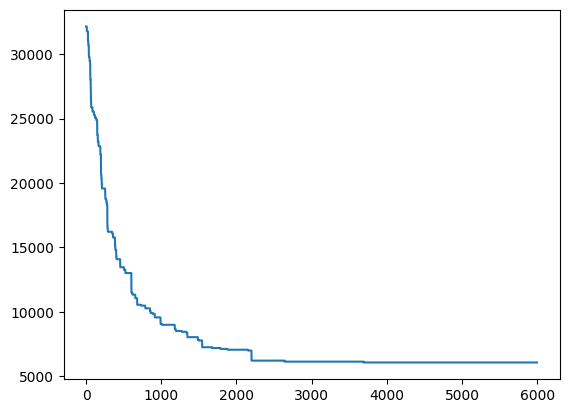

In [46]:
solucao = algoritmo_genetico(dominio, numero_geracoes= 6000)

In [47]:
print(solucao)

[5, 3, 5, 3, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 4, 4, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 5, 0, 5, 5, 4, 0, 4, 0, 0, 5, 4, 0, 4, 4, 4, 1, 3, 3, 0, 0, 4, 1, 3, 3, 0, 3, 3, 1, 2, 0, 2, 5, 5, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]


In [48]:
funcao_avaliacao(solucao)

6062.0

In [49]:
imprimir_qts(solucao)


1ª Turma:
|Segunda| IA, OC, IA, OC, NA, OC|
|Terça  | NA, NA, NA, MF, NA, MF|
|Quarta | NA, NA, MF, NA, MF, MF|
|Quinta | NA, MF, NA, CO, CO, SO|
|Sexta  | NA, OC, OC, OC, NA, NA|

2ª Turma:
|Segunda| NA, NA, NA, NA, NA, NA|
|Terça  | NA, NA, NA, NA, NA, NA|
|Quarta | NA, OC, OC, NA, OC, OC|
|Quinta | NA, NA, IA, NA, IA, IA|
|Sexta  | CO, NA, CO, NA, NA, IA|

3ª Turma:
|Segunda| CO, NA, CO, CO, CO, SO|
|Terça  | OC, OC, NA, NA, CO, SO|
|Quarta | OC, OC, NA, OC, OC, SO|
|Quinta | MF, NA, MF, IA, IA, SO|
|Sexta  | NA, MF, MF, MF, NA, NA|

4ª Turma:
|Segunda| NA, NA, NA, NA, OC, OC|
|Terça  | NA, NA, NA, NA, NA, NA|
|Quarta | NA, CO, CO, CO, NA, NA|
|Quinta | NA, NA, NA, NA, CO, CO|
|Sexta  | NA, OC, NA, OC, OC, OC|

5ª Turma:
|Segunda| NA, NA, NA, NA, NA, NA|
|Terça  | MF, MF, MF, NA, MF, MF|
|Quarta | OC, NA, OC, NA, NA, NA|
|Quinta | NA, NA, NA, NA, NA, NA|
|Sexta  | MF, MF, NA, NA, NA, NA|

Tempo Total de Espera Entre Aulas:  14
